# Data Loading

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from processing_utils.feature_data_from_mat import load_subject_high_gamma

In [3]:
sig = True
zscore = False
cluster = False
data_dir = '../data/'

In [4]:
phon_labels = ['a', 'ae', 'i', 'u', 'b', 'p', 'v', 'g', 'k']
artic_labels = ['low', 'high', 'labial', 'dorsal']
phon_to_artic_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4}

In [5]:
def phon_to_artic(phon_idx, phon_to_artic_conv):
    return phon_to_artic_conv[phon_idx]

def phon_to_artic_seq(phon_seq, phon_to_artic_conv):
    flat_seq = phon_seq.flatten()
    artic_conv = np.array([phon_to_artic(phon_idx, phon_to_artic_conv) for phon_idx in flat_seq])
    return np.reshape(artic_conv, phon_seq.shape)

def labels2cv_seq(labels):
    labels_str = []
    for i in range(labels.shape[0]):
        middle_label = labels[i, 1]
        if middle_label < 5: # middle phoneme if vowel if 1-4 thus cvc
            labels_str.append('cvc')
        else:  
            labels_str.append('vcv')
    return np.array(labels_str)

### Relative to Response Onset

Load in S14 Data

In [6]:
S14_hg_trace, S14_hg_map, S14_phon_labels = load_subject_high_gamma('S14', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir=data_dir)

(144, 200, 111)
(144, 8, 16, 200)
(144, 3)


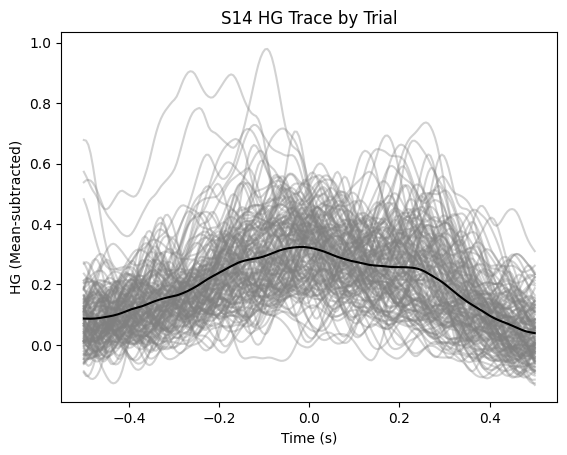

In [7]:
print(S14_hg_trace.shape)
print(S14_hg_map.shape)
print(S14_phon_labels.shape)

plt.figure()
plt.plot(np.linspace(-0.5, 0.5, 200), np.mean(S14_hg_trace, axis=2).T, 'grey', alpha=0.35)
plt.plot(np.linspace(-0.5, 0.5, 200), np.mean(np.mean(S14_hg_trace, axis=2), axis=0), 'black')
plt.xlabel('Time (s)')
plt.ylabel('HG (Mean-subtracted)')
plt.title('S14 HG Trace by Trial')
plt.show()

Load in S26 Data

In [8]:
S26_hg_trace, S26_hg_map, S26_phon_labels = load_subject_high_gamma('S26', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir=data_dir)

(148, 200, 111)
(148, 8, 16, 200)
(148, 3)


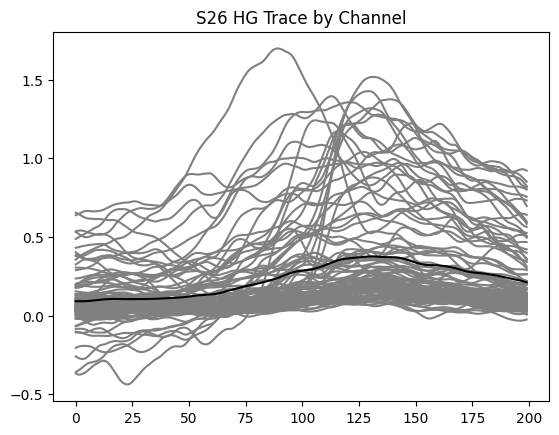

In [9]:
print(S26_hg_trace.shape)
print(S26_hg_map.shape)
print(S26_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S26_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S26_hg_trace, axis=0), axis=1), 'black')
plt.title('S26 HG Trace by Channel')
plt.show()

Load in S23 Data

In [10]:
S23_hg_trace, S23_hg_map, S23_phon_labels = load_subject_high_gamma('S23', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir=data_dir)

(151, 200, 63)
(151, 8, 16, 200)
(151, 3)


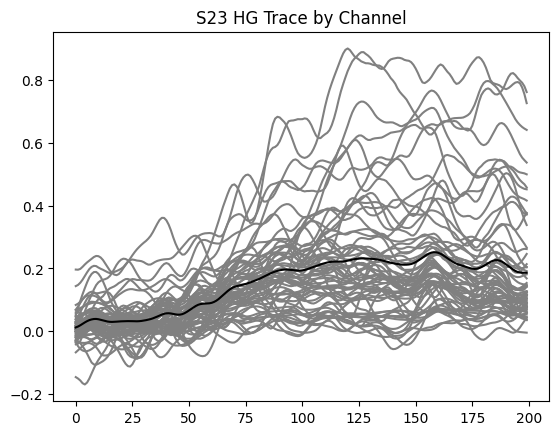

In [11]:
print(S23_hg_trace.shape)
print(S23_hg_map.shape)
print(S23_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S23_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S23_hg_trace, axis=0), axis=1), 'black')
plt.title('S23 HG Trace by Channel')
plt.show()

Load in S33 Data

In [12]:
S33_hg_trace, S33_hg_map, S33_phon_labels = load_subject_high_gamma('S33', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir=data_dir)

(46, 200, 149)
(46, 12, 24, 200)
(46, 3)


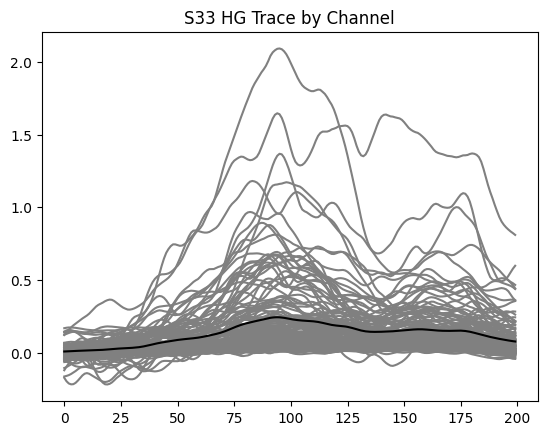

In [13]:
print(S33_hg_trace.shape)
print(S33_hg_map.shape)
print(S33_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S33_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S33_hg_trace, axis=0), axis=1), 'black')
plt.title('S33 HG Trace by Channel')
plt.show()

### Relative to Different Phoneme Onsets

In [14]:
from processing_utils.feature_data_from_mat import load_subject_high_gamma_phoneme

S14 Data

In [15]:
S14_hg_data = load_subject_high_gamma_phoneme('S14', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir=data_dir)

(144, 200, 111) (144, 200, 111) (144, 200, 111)
(144, 8, 16, 200) (144, 8, 16, 200) (144, 8, 16, 200)
(144,) (144,) (144,) (144, 3)


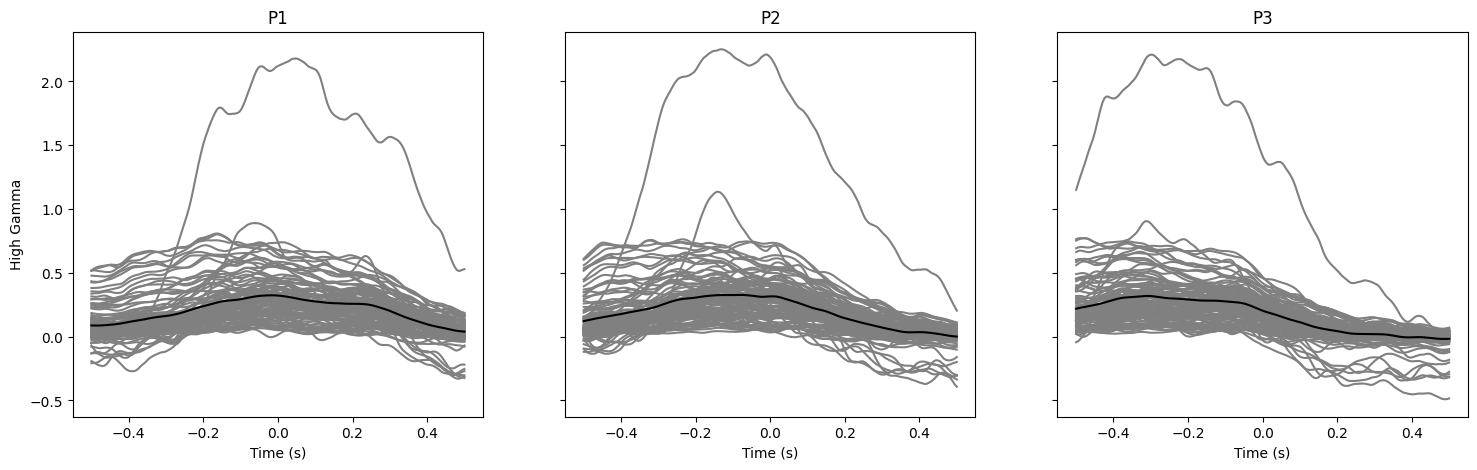

In [17]:
print(S14_hg_data['X1'].shape, S14_hg_data['X2'].shape, S14_hg_data['X3'].shape)
print(S14_hg_data['X1_map'].shape, S14_hg_data['X2_map'].shape, S14_hg_data['X3_map'].shape)
print(S14_hg_data['y1'].shape, S14_hg_data['y2'].shape, S14_hg_data['y3'].shape, S14_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S14_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S14_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S14_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S14_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S14_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S14_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S14_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

S26 data

In [19]:
S26_hg_data = load_subject_high_gamma_phoneme('S26', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir=data_dir)

(148, 200, 111) (148, 200, 111) (148, 200, 111)
(148, 8, 16, 200) (148, 8, 16, 200) (148, 8, 16, 200)
(148,) (148,) (148,) (148, 3)


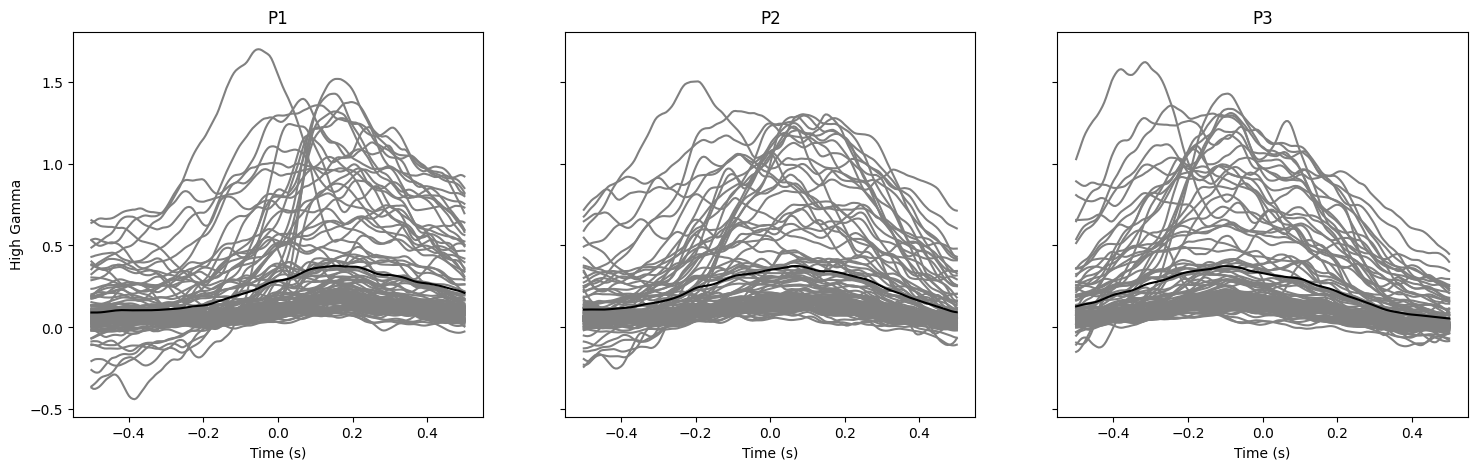

In [20]:
print(S26_hg_data['X1'].shape, S26_hg_data['X2'].shape, S26_hg_data['X3'].shape)
print(S26_hg_data['X1_map'].shape, S26_hg_data['X2_map'].shape, S26_hg_data['X3_map'].shape)
print(S26_hg_data['y1'].shape, S26_hg_data['y2'].shape, S26_hg_data['y3'].shape, S26_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S26_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S26_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S26_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S26_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S26_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S26_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S26_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()


S23 Data

In [21]:
S23_hg_data = load_subject_high_gamma_phoneme('S23', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir=data_dir)

(151, 200, 63) (151, 200, 63) (151, 200, 63)
(151, 8, 16, 200) (151, 8, 16, 200) (151, 8, 16, 200)
(151,) (151,) (151,) (151, 3)


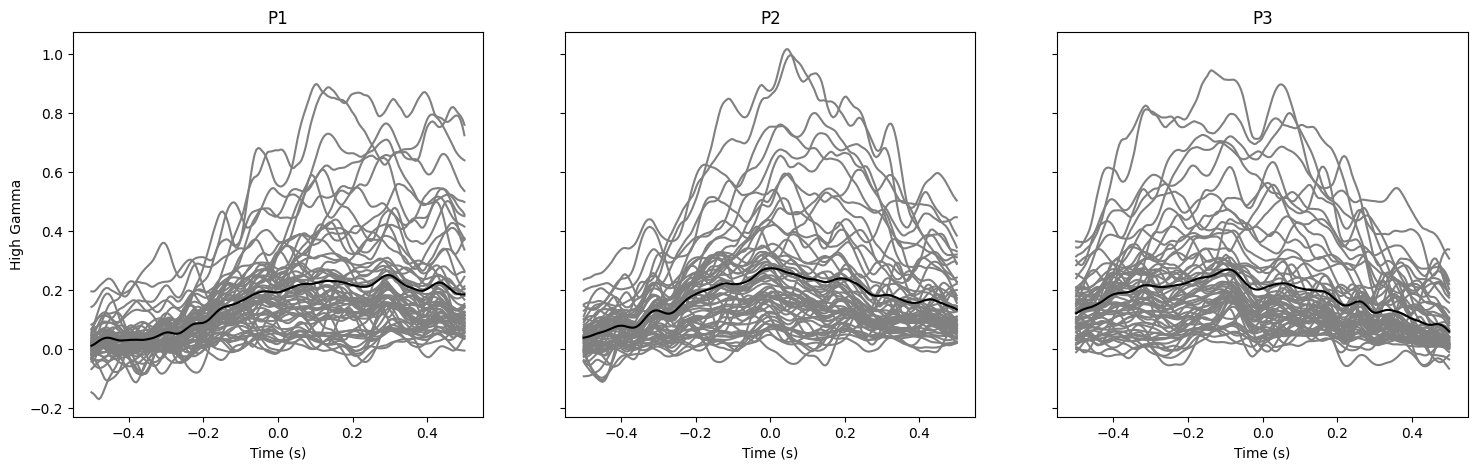

In [22]:
print(S23_hg_data['X1'].shape, S23_hg_data['X2'].shape, S23_hg_data['X3'].shape)
print(S23_hg_data['X1_map'].shape, S23_hg_data['X2_map'].shape, S23_hg_data['X3_map'].shape)
print(S23_hg_data['y1'].shape, S23_hg_data['y2'].shape, S23_hg_data['y3'].shape, S23_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S23_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S23_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S23_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S23_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S23_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S23_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S23_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

S33 Data

In [23]:
S33_hg_data = load_subject_high_gamma_phoneme('S33', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir=data_dir)

(46, 200, 149) (46, 200, 149) (46, 200, 149)
(46, 12, 24, 200) (46, 12, 24, 200) (46, 12, 24, 200)
(46,) (46,) (46,) (46, 3)


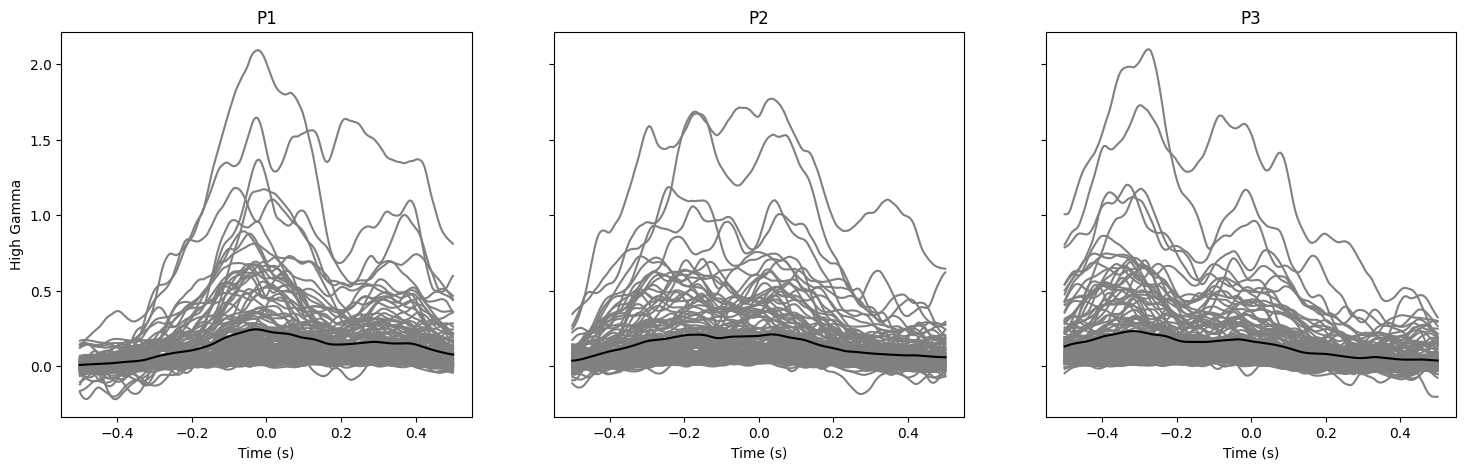

In [24]:
print(S33_hg_data['X1'].shape, S33_hg_data['X2'].shape, S33_hg_data['X3'].shape)
print(S33_hg_data['X1_map'].shape, S33_hg_data['X2_map'].shape, S33_hg_data['X3_map'].shape)
print(S33_hg_data['y1'].shape, S33_hg_data['y2'].shape, S33_hg_data['y3'].shape, S33_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S33_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S33_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S33_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S33_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S33_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S33_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S33_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

In [25]:
S14_artic_labels = phon_to_artic_seq(S14_phon_labels, phon_to_artic_dict)
S26_artic_labels = phon_to_artic_seq(S26_phon_labels, phon_to_artic_dict)
S23_artic_labels = phon_to_artic_seq(S23_phon_labels, phon_to_artic_dict)
S33_artic_labels = phon_to_artic_seq(S33_phon_labels, phon_to_artic_dict)

In [26]:
S14_str_labels_cv_seq = labels2cv_seq(S14_phon_labels)
S26_str_labels_cv_seq = labels2cv_seq(S26_phon_labels)
S23_str_labels_cv_seq = labels2cv_seq(S23_phon_labels)
S33_str_labels_cv_seq = labels2cv_seq(S33_phon_labels)

### Collapse Across Positions

In [ ]:
S14_hg_collapsed = np.concatenate((S14_hg_data['X1'], S14_hg_data['X2'], S14_hg_data['X3']), axis=0)
S14_phon_labels_collapsed = np.concatenate((S14_hg_data['y1'], S14_hg_data['y2'], S14_hg_data['y3']), axis=0)

S26_hg_collapsed = np.concatenate((S26_hg_data['X1'], S26_hg_data['X2'], S26_hg_data['X3']), axis=0)
S26_phon_labels_collapsed = np.concatenate((S26_hg_data['y1'], S26_hg_data['y2'], S26_hg_data['y3']), axis=0)

S23_hg_collapsed = np.concatenate((S23_hg_data['X1'], S23_hg_data['X2'], S23_hg_data['X3']), axis=0)
S23_phon_labels_collapsed = np.concatenate((S23_hg_data['y1'], S23_hg_data['y2'], S23_hg_data['y3']), axis=0)

S33_hg_collapsed = np.concatenate((S33_hg_data['X1'], S33_hg_data['X2'], S33_hg_data['X3']), axis=0)
S33_phon_labels_collapsed = np.concatenate((S33_hg_data['y1'], S33_hg_data['y2'], S33_hg_data['y3']), axis=0)

In [ ]:
S14_artic_labels_collapsed = phon_to_artic_seq(S14_phon_labels_collapsed, phon_to_artic_dict)
S26_artic_labels_collapsed = phon_to_artic_seq(S26_phon_labels_collapsed, phon_to_artic_dict)
S23_artic_labels_collapsed = phon_to_artic_seq(S23_phon_labels_collapsed, phon_to_artic_dict)
S33_artic_labels_collapsed = phon_to_artic_seq(S33_phon_labels_collapsed, phon_to_artic_dict)

# Joint PCA decomposition Exploration and Visualization

In [325]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from utils import cnd_avg, label2str

S14_artic_seqs = label2str(S14_artic_labels)
S14_phon_seqs = label2str(S14_phon_labels)
S14_phon_cnd_avg = np.swapaxes(cnd_avg(S14_hg_trace, S14_phon_seqs), 0, -1)
print(S14_phon_cnd_avg.shape)
S14_artic_cnd_avg = np.swapaxes(cnd_avg(S14_hg_trace, S14_artic_seqs), 0, -1)
print(S14_artic_cnd_avg.shape)

S26_artic_seqs = label2str(S26_artic_labels)
S26_phon_seqs = label2str(S26_phon_labels)
S26_phon_cnd_avg = np.swapaxes(cnd_avg(S26_hg_trace, S26_phon_seqs), 0, -1)
print(S26_phon_cnd_avg.shape)
S26_artic_cnd_avg = np.swapaxes(cnd_avg(S26_hg_trace, S26_artic_seqs), 0, -1)
print(S26_artic_cnd_avg.shape)

S23_artic_seqs = label2str(S23_artic_labels)
S23_phon_seqs = label2str(S23_phon_labels)
S23_phon_cnd_avg = np.swapaxes(cnd_avg(S23_hg_trace, S23_phon_seqs), 0, -1)
print(S23_phon_cnd_avg.shape)
S23_artic_cnd_avg = np.swapaxes(cnd_avg(S23_hg_trace, S23_artic_seqs), 0, -1)
print(S23_artic_cnd_avg.shape)

S33_artic_seqs = label2str(S33_artic_labels)
S33_phon_seqs = label2str(S33_phon_labels)
S33_phon_cnd_avg = np.swapaxes(cnd_avg(S33_hg_trace, S33_phon_seqs), 0, -1)
print(S33_phon_cnd_avg.shape)
S33_artic_cnd_avg = np.swapaxes(cnd_avg(S33_hg_trace, S33_artic_seqs), 0, -1)
print(S33_artic_cnd_avg.shape)
print()

cross_pt_phon_mat = np.concatenate([S14_phon_cnd_avg, S26_phon_cnd_avg, S23_phon_cnd_avg], axis=0)
cross_pt_artic_mat = np.concatenate([S14_artic_cnd_avg, S26_artic_cnd_avg, S23_artic_cnd_avg, S33_artic_cnd_avg], axis=0)
print(cross_pt_phon_mat.shape)
print(cross_pt_artic_mat.shape)

dr = PCA(n_components=40)
# dr = Isomap(n_components=40)
phon_factor_mat = dr.fit_transform(cross_pt_phon_mat.reshape(cross_pt_phon_mat.shape[0], -1).T).T
artic_factor_mat = dr.fit_transform(cross_pt_artic_mat.reshape(cross_pt_artic_mat.shape[0], -1).T).T
print(phon_factor_mat.shape)
print(artic_factor_mat.shape)

(111, 200, 52)
(111, 200, 15)
(111, 200, 52)
(111, 200, 15)
(63, 200, 52)
(63, 200, 15)
(149, 200, 46)
(149, 200, 15)

(285, 200, 52)
(434, 200, 15)
(40, 10400)
(40, 3000)


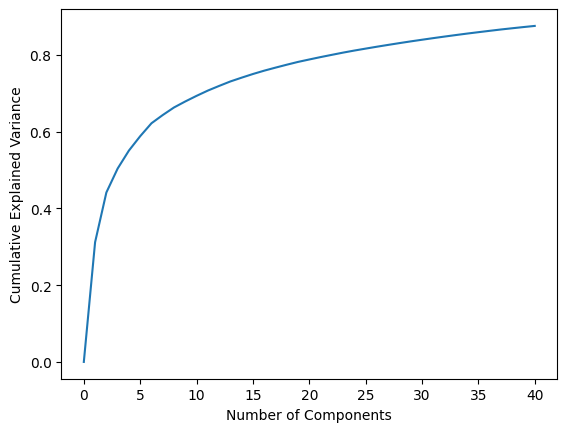

[0.31189745 0.441352   0.50373121 0.55057683 0.58799071 0.62169697
 0.64310802 0.66285739 0.67848978 0.69308448 0.70680278 0.71894106
 0.73061382 0.74049549 0.74999216 0.75870748 0.76659571 0.77421085
 0.78151126 0.78785182 0.79407172 0.79993935 0.80573831 0.81112903
 0.81616265 0.82111364 0.82585188 0.83050171 0.83499609 0.83927004
 0.84348199 0.84753798 0.85147304 0.85532269 0.85894467 0.86249967
 0.86598735 0.8691811  0.8722937  0.87527098]


In [329]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot([0] + [*np.cumsum(dr.explained_variance_ratio_)])
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.show()

print(np.cumsum(dr.explained_variance_ratio_))

# expl_thresh = 0.9
# comp_expl = np.where(np.cumsum(pca.explained_variance_ratio_) > expl_thresh)[0][0]
# print(f'Number of components to explain {expl_thresh*100}% of variance: {comp_expl}')

Phoneme Condition Averaging

In [330]:
S14_factor_trans = np.linalg.pinv(phon_factor_mat).T @ S14_phon_cnd_avg.reshape(S14_phon_cnd_avg.shape[0], -1).T
print(S14_factor_trans.shape)
S14_joint_decomp = S14_hg_trace.reshape(-1, S14_hg_trace.shape[-1]) @ S14_factor_trans.T
S14_joint_decomp = S14_joint_decomp.reshape(S14_hg_trace.shape[0], S14_hg_trace.shape[1], -1)
print(S14_joint_decomp.shape)
print()

S26_factor_trans = np.linalg.pinv(phon_factor_mat).T @ S26_phon_cnd_avg.reshape(S26_phon_cnd_avg.shape[0], -1).T
print(S26_factor_trans.shape)
S26_joint_decomp = S26_hg_trace.reshape(-1, S26_hg_trace.shape[-1]) @ S26_factor_trans.T
S26_joint_decomp = S26_joint_decomp.reshape(S26_hg_trace.shape[0], S26_hg_trace.shape[1], -1)
print(S26_joint_decomp.shape)
print()

S23_factor_trans = np.linalg.pinv(phon_factor_mat).T @ S23_phon_cnd_avg.reshape(S23_phon_cnd_avg.shape[0], -1).T
print(S23_factor_trans.shape)
S23_joint_decomp = S23_hg_trace.reshape(-1, S23_hg_trace.shape[-1]) @ S23_factor_trans.T
S23_joint_decomp = S23_joint_decomp.reshape(S23_hg_trace.shape[0], S23_hg_trace.shape[1], -1)
print(S23_joint_decomp.shape)
print()

(40, 111)
(144, 200, 40)

(40, 111)


(148, 200, 40)

(40, 63)
(151, 200, 40)



Articulator Condition Averaging

In [331]:
S14_factor_trans = np.linalg.pinv(artic_factor_mat).T @ S14_artic_cnd_avg.reshape(S14_artic_cnd_avg.shape[0], -1).T
print(S14_factor_trans.shape)
S14_joint_decomp = S14_hg_trace.reshape(-1, S14_hg_trace.shape[-1]) @ S14_factor_trans.T
S14_joint_decomp = S14_joint_decomp.reshape(S14_hg_trace.shape[0], S14_hg_trace.shape[1], -1)
print(S14_joint_decomp.shape)
print()

S26_factor_trans = np.linalg.pinv(artic_factor_mat).T @ S26_artic_cnd_avg.reshape(S26_artic_cnd_avg.shape[0], -1).T
print(S26_factor_trans.shape)
S26_joint_decomp = S26_hg_trace.reshape(-1, S26_hg_trace.shape[-1]) @ S26_factor_trans.T
S26_joint_decomp = S26_joint_decomp.reshape(S26_hg_trace.shape[0], S26_hg_trace.shape[1], -1)
print(S26_joint_decomp.shape)
print()

S23_factor_trans = np.linalg.pinv(artic_factor_mat).T @ S23_artic_cnd_avg.reshape(S23_artic_cnd_avg.shape[0], -1).T
print(S23_factor_trans.shape)
S23_joint_decomp = S23_hg_trace.reshape(-1, S23_hg_trace.shape[-1]) @ S23_factor_trans.T
S23_joint_decomp = S23_joint_decomp.reshape(S23_hg_trace.shape[0], S23_hg_trace.shape[1], -1)
print(S23_joint_decomp.shape)
print()

S33_factor_trans = np.linalg.pinv(artic_factor_mat).T @ S33_artic_cnd_avg.reshape(S33_artic_cnd_avg.shape[0], -1).T
print(S33_factor_trans.shape)
S33_joint_decomp = S33_hg_trace.reshape(-1, S33_hg_trace.shape[-1]) @ S33_factor_trans.T
S33_joint_decomp = S33_joint_decomp.reshape(S33_hg_trace.shape[0], S33_hg_trace.shape[1], -1)
print(S33_joint_decomp.shape)
print()

(40, 111)
(144, 200, 40)

(40, 111)
(148, 200, 40)

(40, 63)
(151, 200, 40)

(40, 149)
(46, 200, 40)



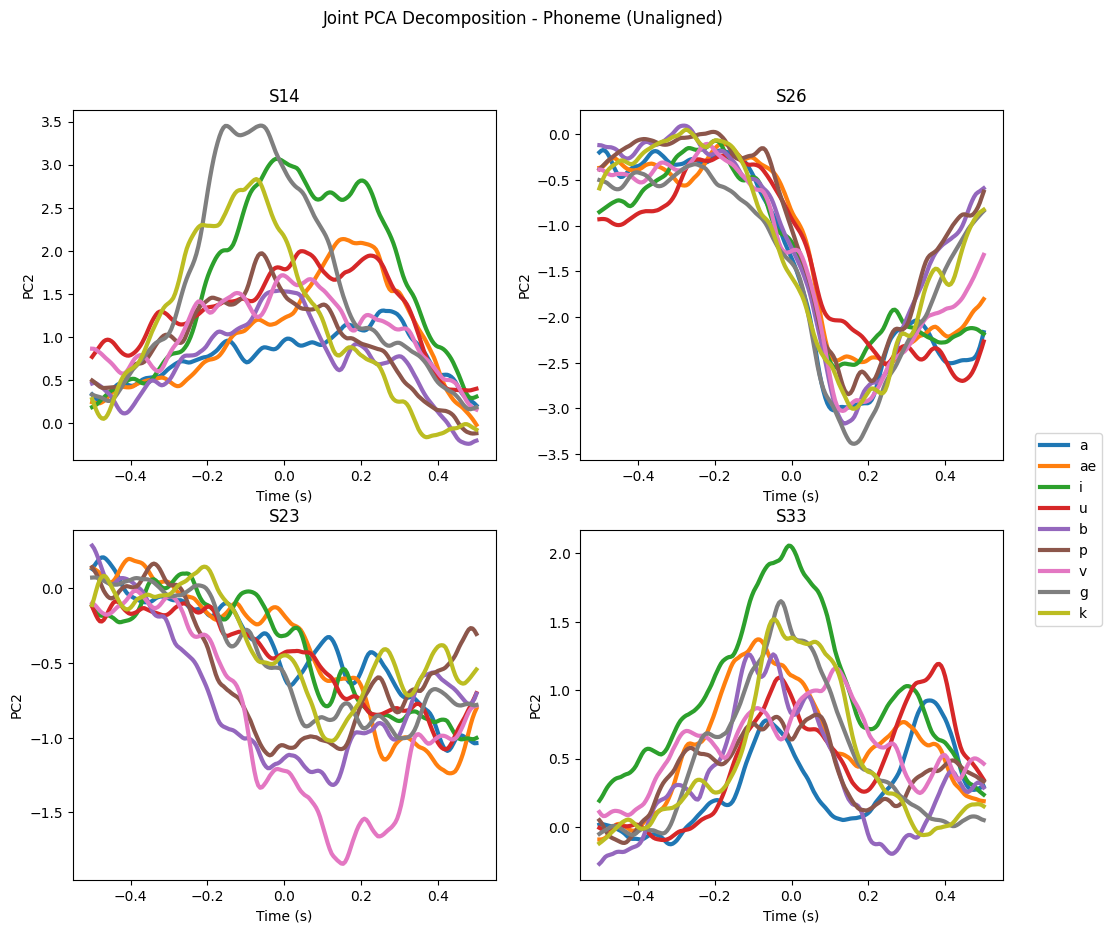

In [332]:
from alignment_visualization import plot_1D_lat_dyn, plot_3D_lat_dyn

t = np.linspace(-0.5, 0.5, S14_hg_trace.shape[1])
plot_1D_lat_dyn(t, [S14_joint_decomp, S26_joint_decomp, S23_joint_decomp, S33_joint_decomp],
                #    [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                   [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                #    artic_labels,
                   phon_labels, 
                   ['S14', 'S26', 'S23', 'S33'], pc_ind=1,
                #    title='Joint PCA Decomposition - Articulator (Unaligned)',
                   title='Joint PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=False)

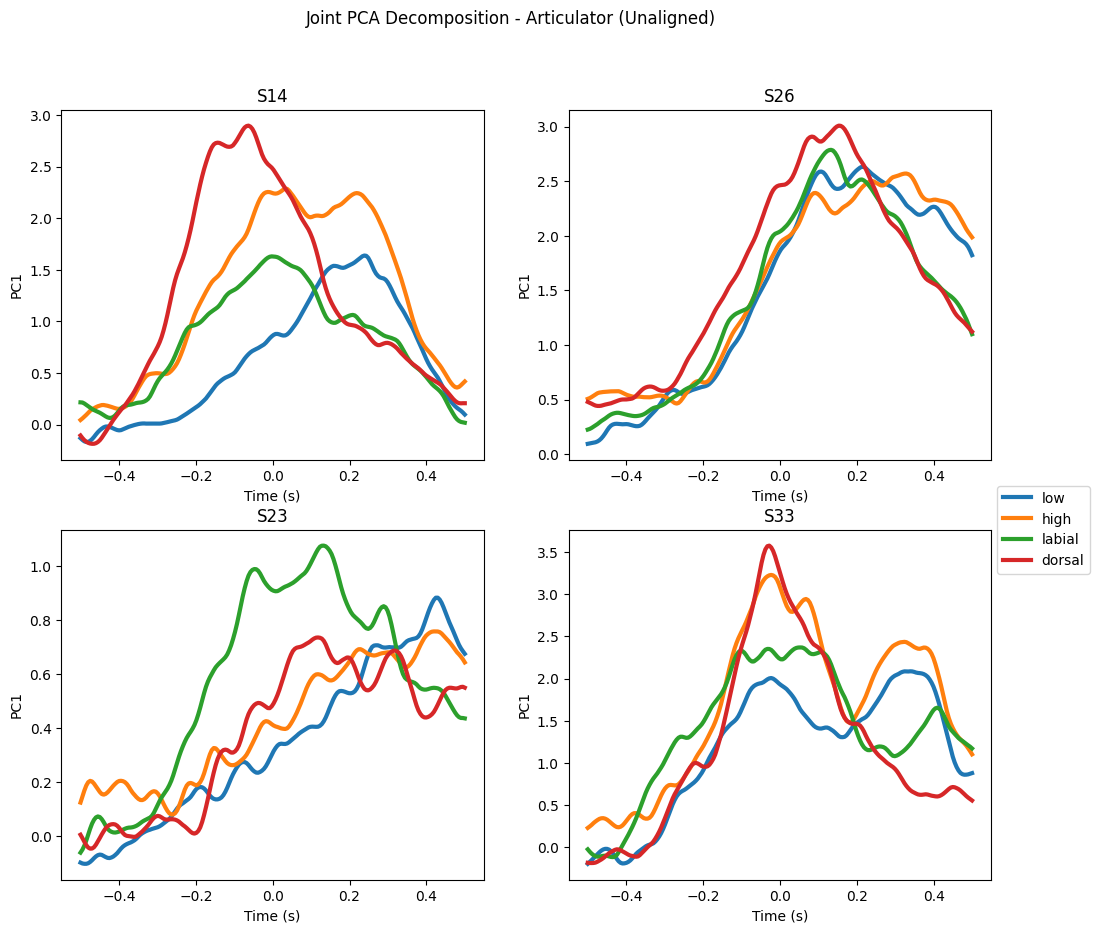

In [333]:
t = np.linspace(-0.5, 0.5, S14_hg_trace.shape[1])
plot_1D_lat_dyn(t, [S14_joint_decomp, S26_joint_decomp, S23_joint_decomp, S33_joint_decomp],
                   [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                #    [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                   artic_labels,
                #    phon_labels, 
                   ['S14', 'S26', 'S23', 'S33'], pc_ind=0,
                   title='Joint PCA Decomposition - Articulator (Unaligned)',
                #    title='Joint PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=False)

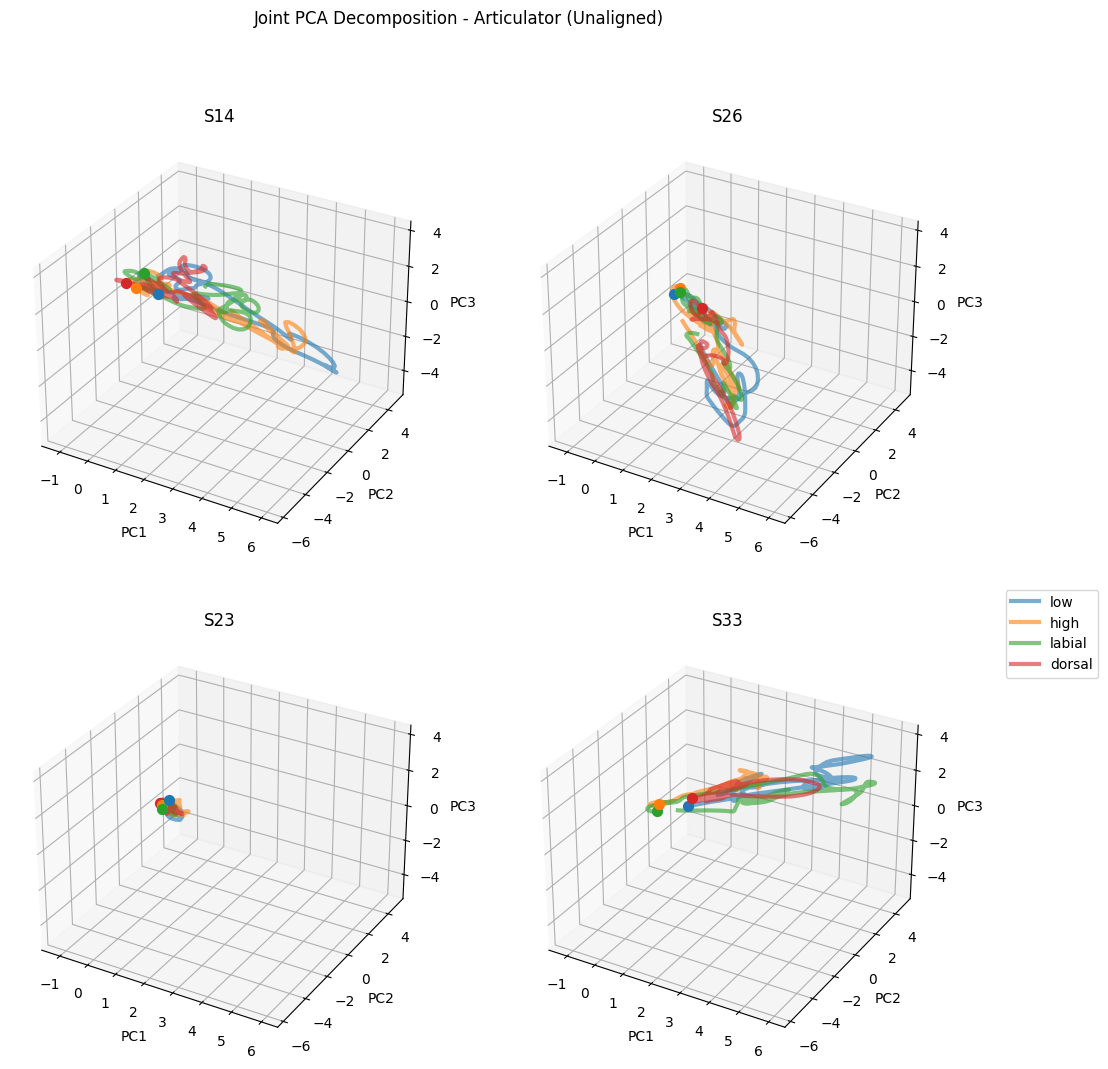

In [334]:
plot_3D_lat_dyn([S14_joint_decomp, S26_joint_decomp, S23_joint_decomp, S33_joint_decomp],
                   [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                  #  [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                   artic_labels,
                  #  phon_labels, 
                   ['S14', 'S26', 'S23', 'S33'],
                   title='Joint PCA Decomposition - Articulator (Unaligned)',
                  #  title='Joint PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=True)

In [335]:
S14_cv_seqs = np.ones(S14_str_labels_cv_seq.shape)
S14_cv_seqs[np.where(S14_str_labels_cv_seq == 'vcv')] = 2

S26_cv_seqs = np.ones(S26_str_labels_cv_seq.shape)
S26_cv_seqs[np.where(S26_str_labels_cv_seq == 'vcv')] = 2

S23_cv_seqs = np.ones(S23_str_labels_cv_seq.shape)
S23_cv_seqs[np.where(S23_str_labels_cv_seq == 'vcv')] = 2

S33_cv_seqs = np.ones(S33_str_labels_cv_seq.shape)
S33_cv_seqs[np.where(S33_str_labels_cv_seq == 'vcv')] = 2

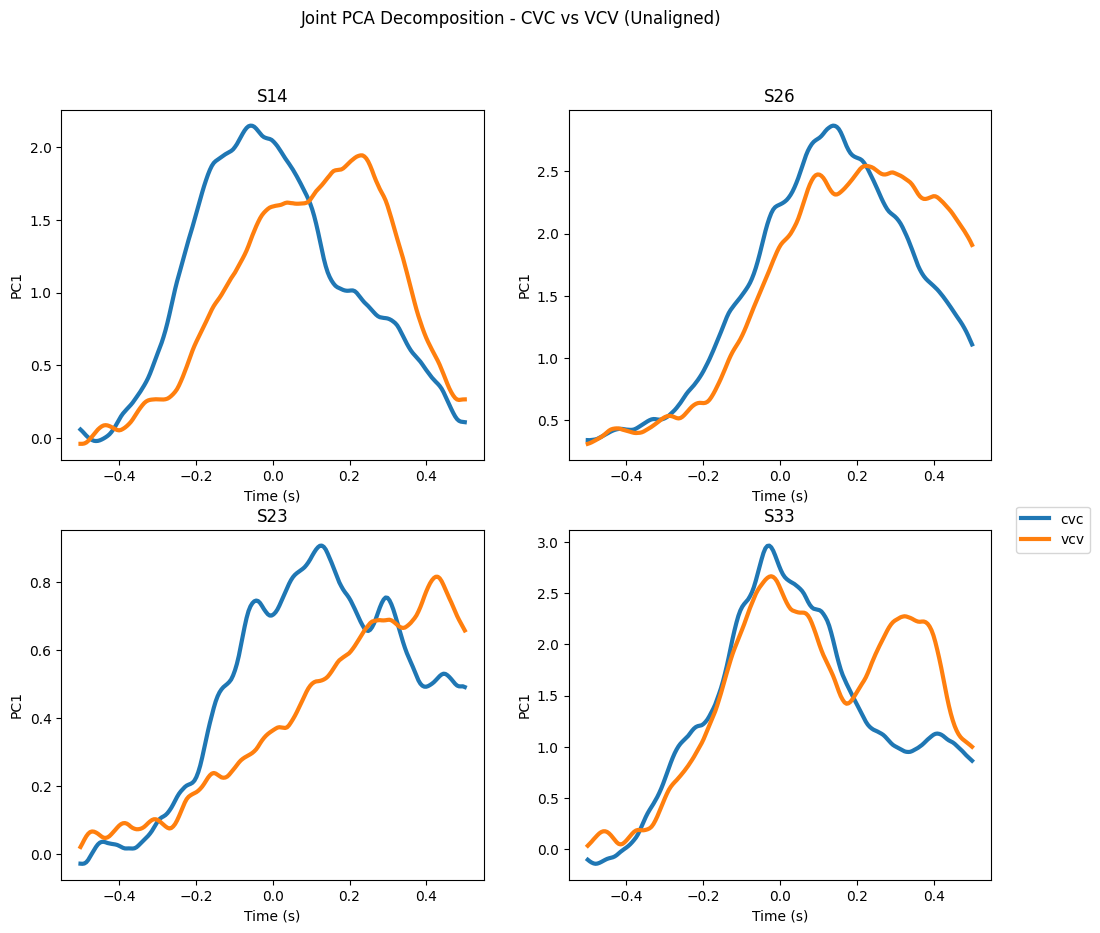

In [336]:
t = np.linspace(-0.5, 0.5, S14_hg_trace.shape[1])
plot_1D_lat_dyn(t, [S14_joint_decomp, S26_joint_decomp, S23_joint_decomp, S33_joint_decomp],
                   [S14_cv_seqs, S26_cv_seqs, S23_cv_seqs, S33_cv_seqs],
                   ['cvc', 'vcv'],
                   ['S14', 'S26', 'S23', 'S33'], pc_ind=0,
                   title='Joint PCA Decomposition - CVC vs VCV (Unaligned)',
                #    title='Joint PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=False)

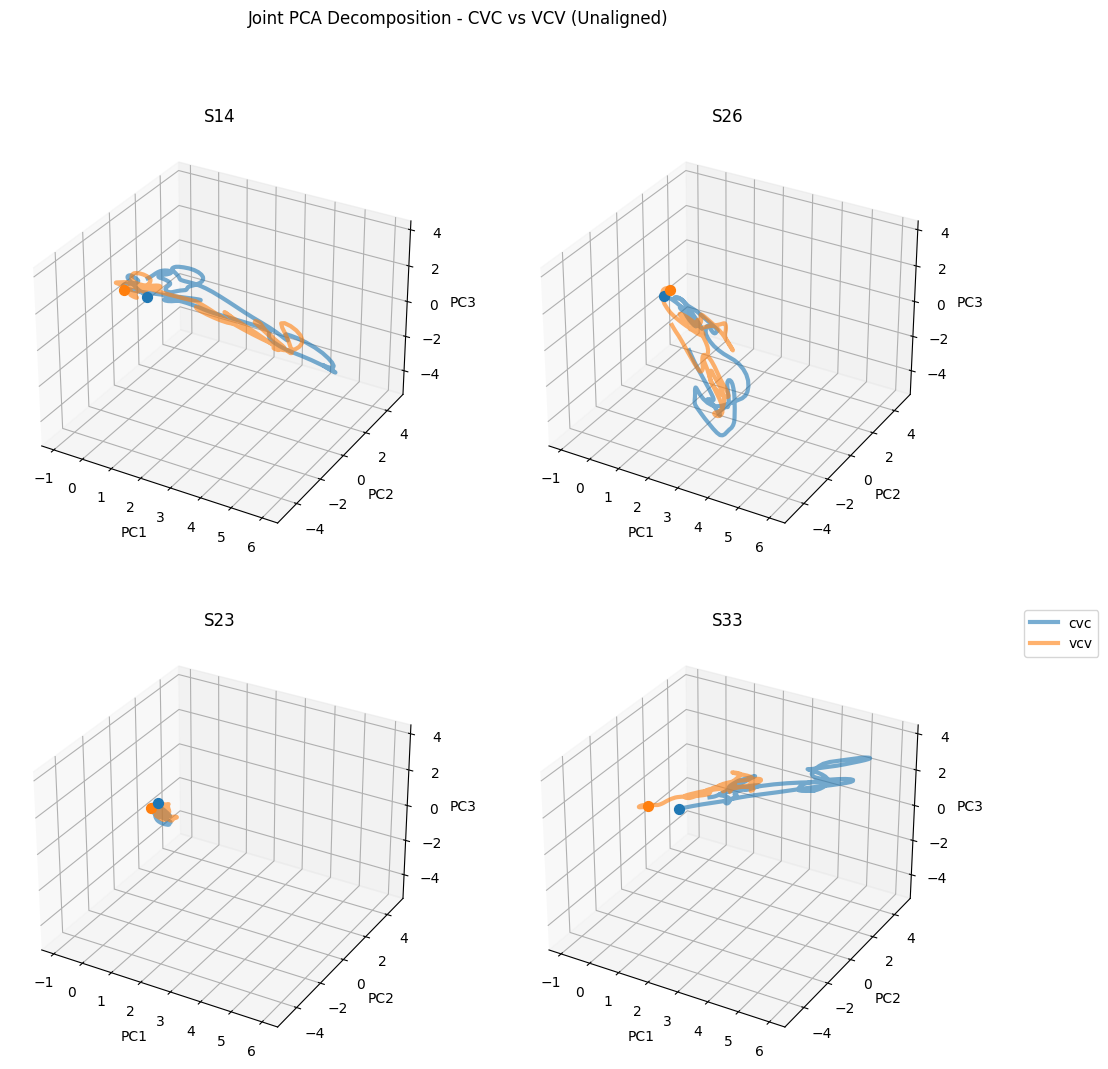

In [337]:
plot_3D_lat_dyn([S14_joint_decomp, S26_joint_decomp, S23_joint_decomp, S33_joint_decomp],
                   [S14_cv_seqs, S26_cv_seqs, S23_cv_seqs, S33_cv_seqs],
                   ['cvc', 'vcv'],
                   ['S14', 'S26', 'S23', 'S33'],
                   title='Joint PCA Decomposition - CVC vs VCV (Unaligned)',
                   same_axes=True)

Aligning Joint Decomposition

In [338]:
from alignment_fcns import CCA_align_by_class

In [339]:
X_S14_cca, X_S26_cca = CCA_align_by_class(S14_joint_decomp, S26_joint_decomp, S14_artic_labels, S26_artic_labels, return_space='shared')

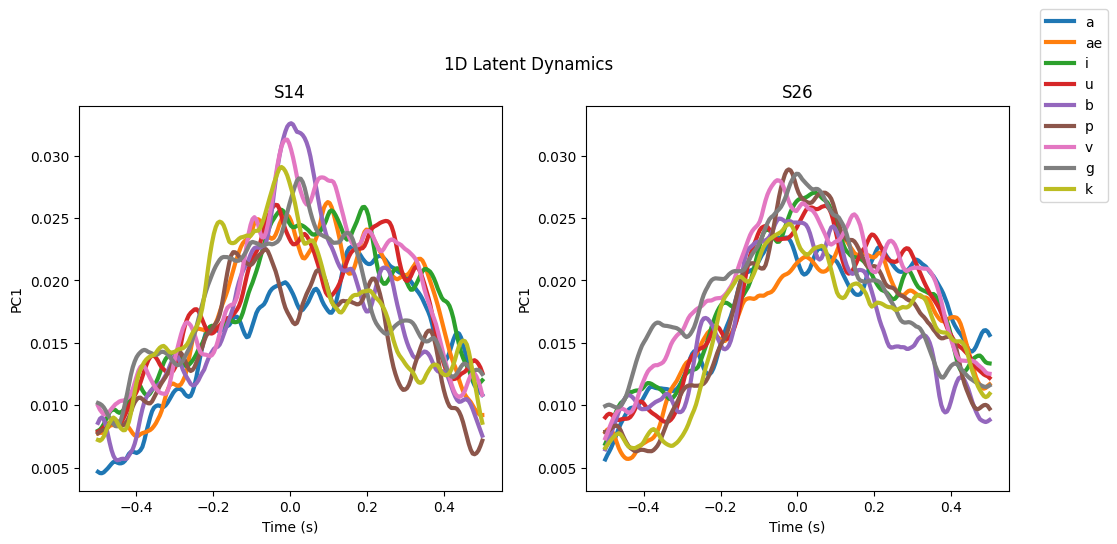

In [340]:
plot_1D_lat_dyn(t, [X_S14_cca, X_S26_cca], [S14_phon_labels[:,0], S26_phon_labels[:,0]], phon_labels, ['S14', 'S26'], figsize=(12, 5), pc_ind=0)

In [341]:
_, X_S26_S14 = CCA_align_by_class(S14_joint_decomp, S26_joint_decomp, S14_artic_labels, S26_artic_labels, return_space='b_to_a')
_, X_S23_S14 = CCA_align_by_class(S14_joint_decomp, S23_joint_decomp, S14_artic_labels, S23_artic_labels, return_space='b_to_a')
_, X_S33_S14 = CCA_align_by_class(S14_joint_decomp, S33_joint_decomp, S14_artic_labels, S33_artic_labels, return_space='b_to_a')

# _, X_S26_S14 = CCA_align_by_class(S14_joint_decomp, S26_joint_decomp, S14_phon_labels, S26_phon_labels, return_space='b_to_a')
# _, X_S23_S14 = CCA_align_by_class(S14_joint_decomp, S23_joint_decomp, S14_phon_labels, S23_phon_labels, return_space='b_to_a')
# _, X_S33_S14 = CCA_align_by_class(S14_joint_decomp, S33_joint_decomp, S14_phon_labels, S33_phon_labels, return_space='b_to_a')

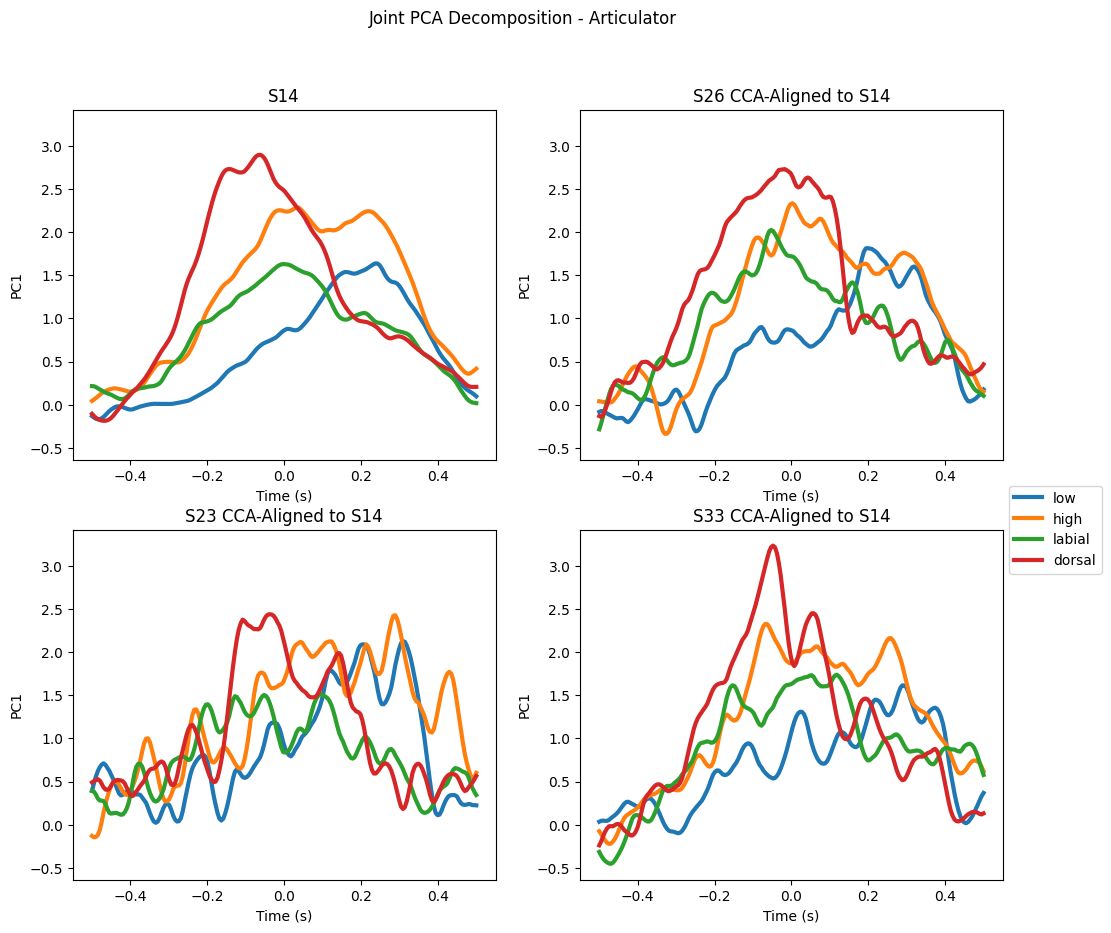

In [342]:
plot_1D_lat_dyn(t, [S14_joint_decomp, X_S26_S14, X_S23_S14, X_S33_S14],
                   [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                #    [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                   artic_labels,
                #    phon_labels, 
                   ['S14', 'S26 CCA-Aligned to S14', 'S23 CCA-Aligned to S14', 'S33 CCA-Aligned to S14'], pc_ind=0,
                   title='Joint PCA Decomposition - Articulator',
                #    title='Joint PCA Decomposition - Phoneme',
                   same_axes=True)

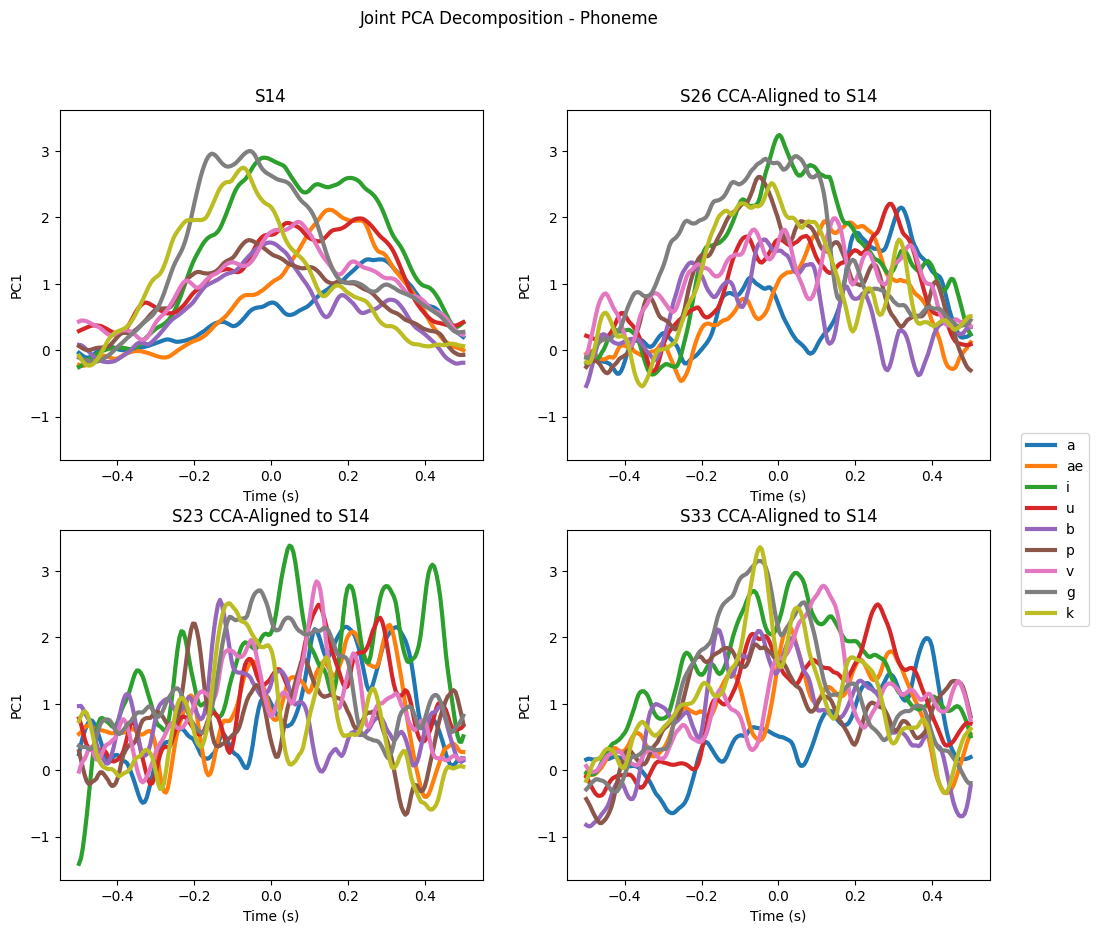

In [343]:
plot_1D_lat_dyn(t, [S14_joint_decomp, X_S26_S14, X_S23_S14, X_S33_S14],
                #    [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                   [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                #    artic_labels,
                   phon_labels, 
                   ['S14', 'S26 CCA-Aligned to S14', 'S23 CCA-Aligned to S14', 'S33 CCA-Aligned to S14'], pc_ind=0,
                #    title='Joint PCA Decomposition - Articulator',
                   title='Joint PCA Decomposition - Phoneme',
                   same_axes=True)

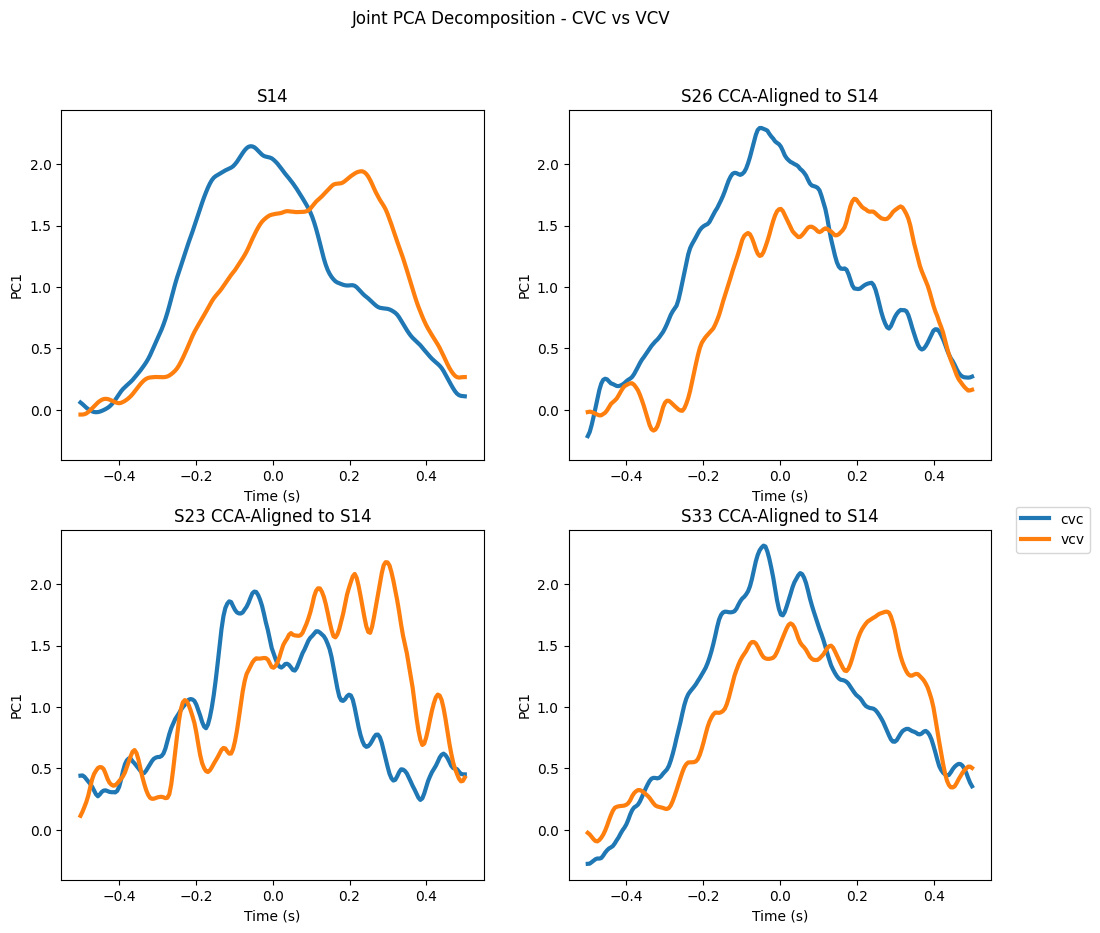

In [344]:
plot_1D_lat_dyn(t, [S14_joint_decomp, X_S26_S14, X_S23_S14, X_S33_S14],
                   [S14_cv_seqs, S26_cv_seqs, S23_cv_seqs, S33_cv_seqs],
                   ['cvc', 'vcv'],
                   ['S14', 'S26 CCA-Aligned to S14', 'S23 CCA-Aligned to S14', 'S33 CCA-Aligned to S14'], pc_ind=0,
                   title='Joint PCA Decomposition - CVC vs VCV',
                #    title='Joint PCA Decomposition - Phoneme (Unaligned)',
                   same_axes=True)

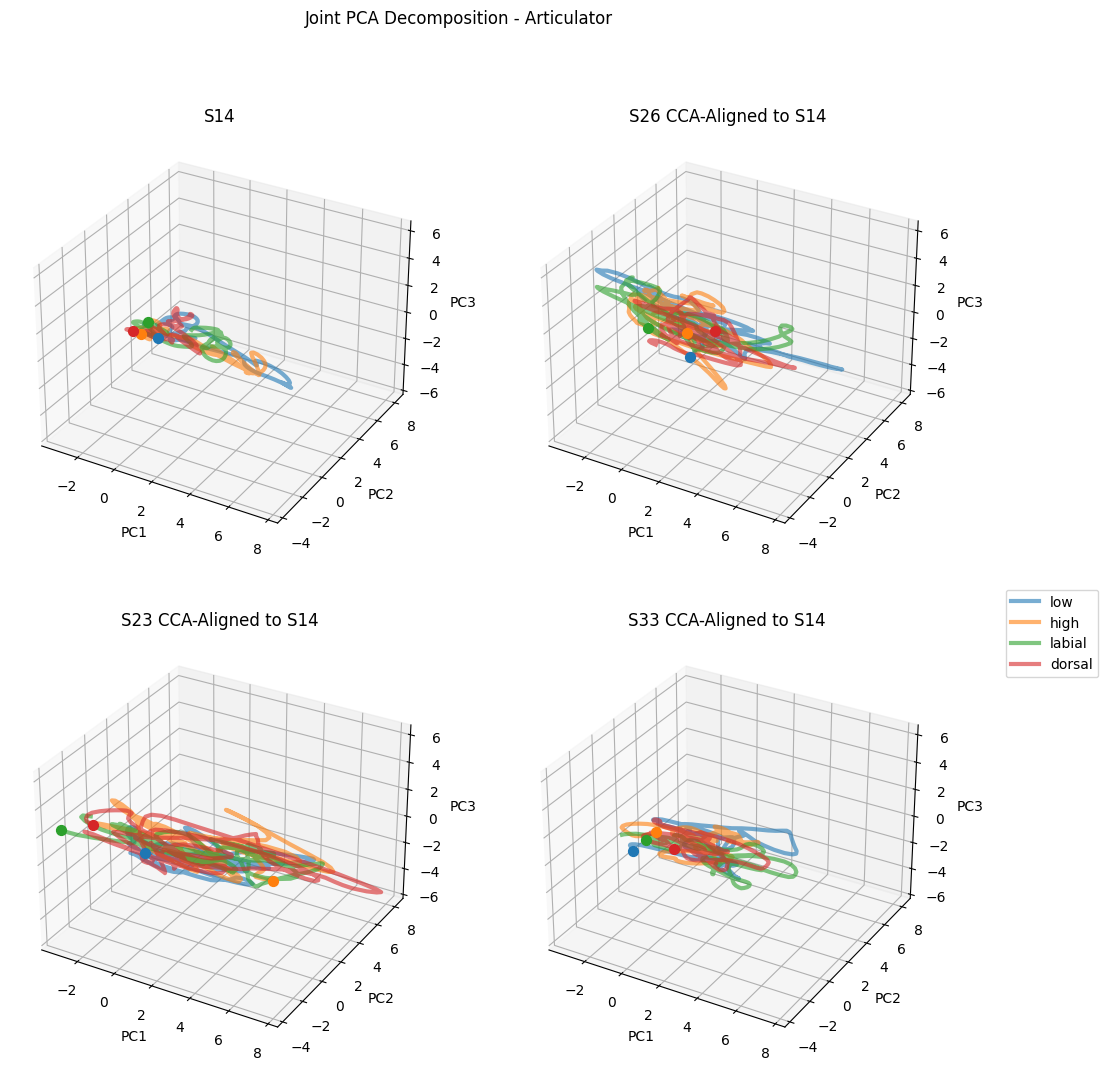

In [345]:
plot_3D_lat_dyn([S14_joint_decomp, X_S26_S14, X_S23_S14, X_S33_S14],
                [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                # [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                artic_labels,
                # phon_labels,
                ['S14', 'S26 CCA-Aligned to S14', 'S23 CCA-Aligned to S14', 'S33 CCA-Aligned to S14'],
                title='Joint PCA Decomposition - Articulator',
                # title='Joint PCA Decomposition - Phoneme',
                same_axes=True)

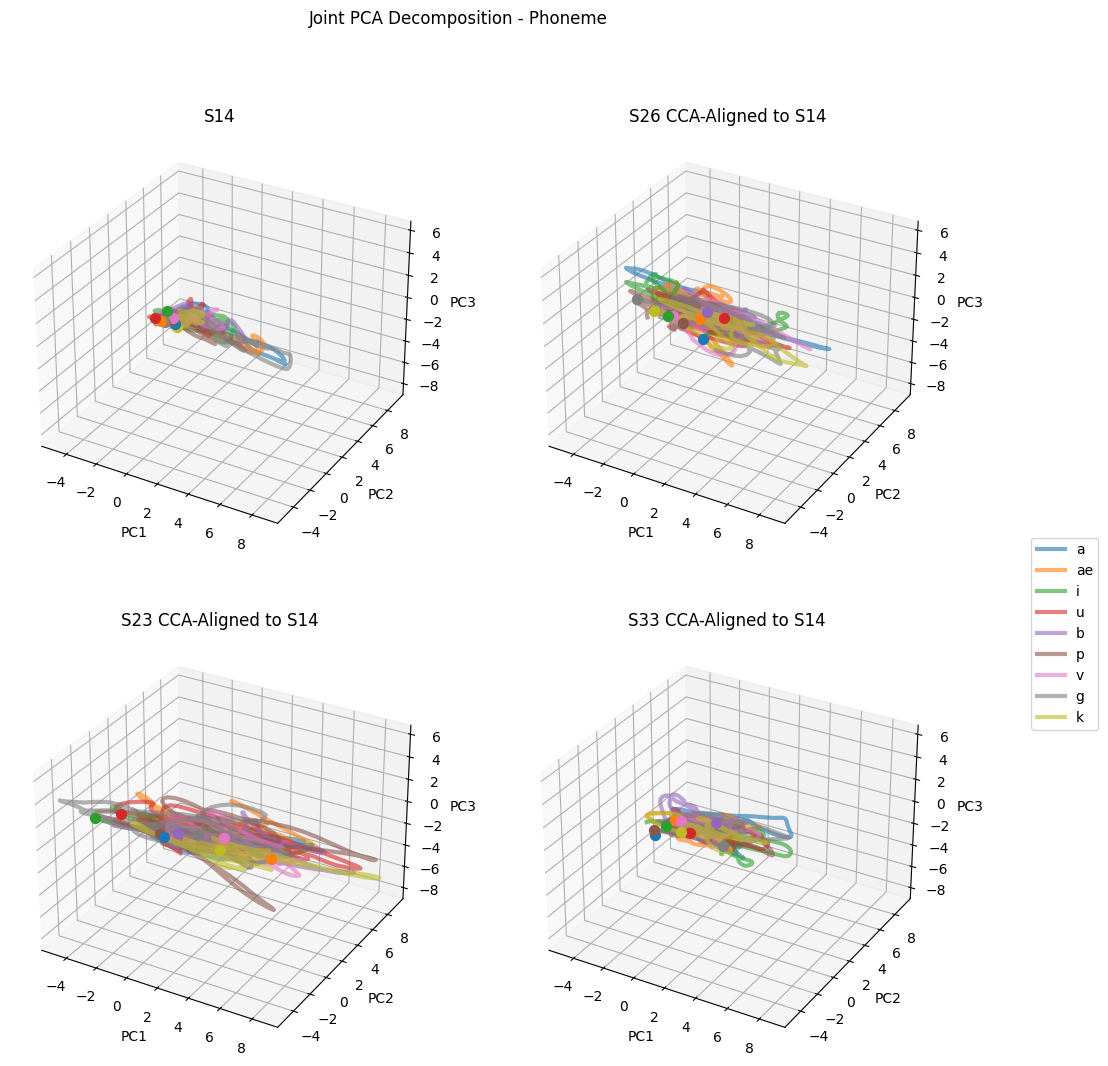

In [346]:
plot_3D_lat_dyn([S14_joint_decomp, X_S26_S14, X_S23_S14, X_S33_S14],
                # [S14_artic_labels[:,0], S26_artic_labels[:,0], S23_artic_labels[:,0], S33_artic_labels[:,0]],
                [S14_phon_labels[:,0], S26_phon_labels[:,0], S23_phon_labels[:,0], S33_phon_labels[:,0]],
                # artic_labels,
                phon_labels,
                ['S14', 'S26 CCA-Aligned to S14', 'S23 CCA-Aligned to S14', 'S33 CCA-Aligned to S14'],
                # title='Joint PCA Decomposition - Articulator',
                title='Joint PCA Decomposition - Phoneme',
                same_axes=True)

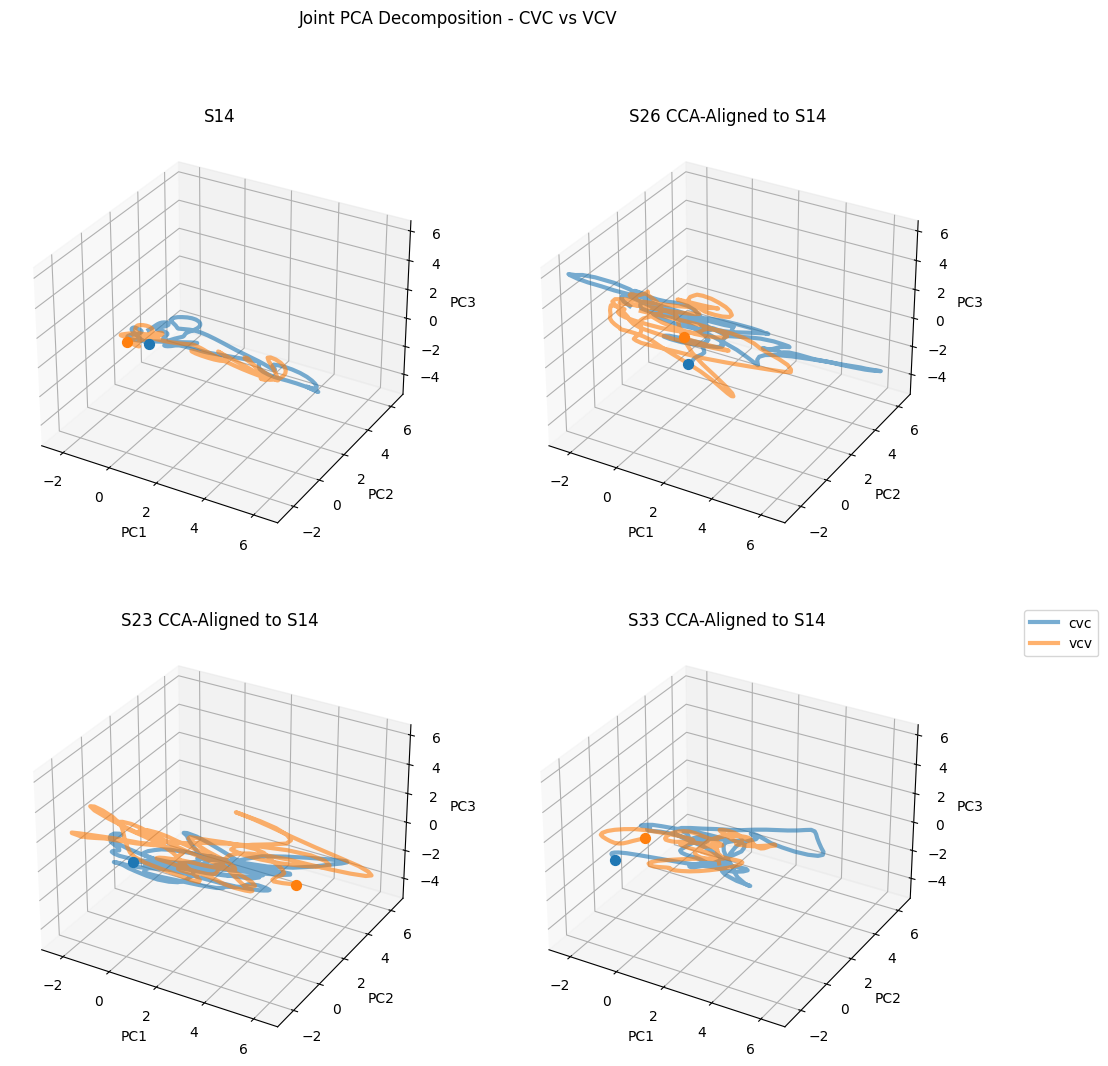

In [347]:
plot_3D_lat_dyn([S14_joint_decomp, X_S26_S14, X_S23_S14, X_S33_S14],
                   [S14_cv_seqs, S26_cv_seqs, S23_cv_seqs, S33_cv_seqs],
                   ['cvc', 'vcv'],
                   ['S14', 'S26 CCA-Aligned to S14', 'S23 CCA-Aligned to S14', 'S33 CCA-Aligned to S14'],
                   title='Joint PCA Decomposition - CVC vs VCV',
                   same_axes=True)

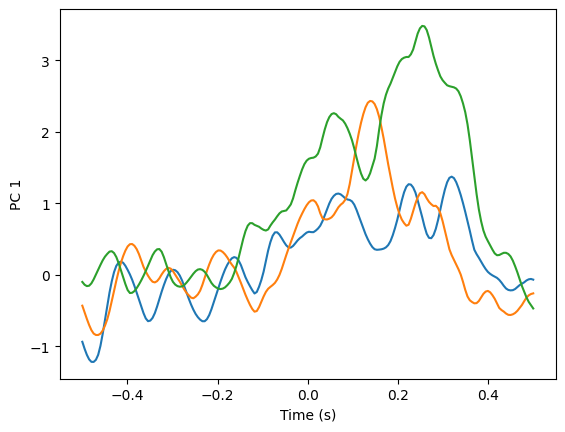

In [348]:
tr_ind = 10

plt.figure()
plt.plot(t, S14_joint_decomp[np.where(S14_phon_seqs == np.unique(S14_phon_seqs)[tr_ind])[0],:,0].T)
plt.ylabel('PC 1')
plt.xlabel('Time (s)')
plt.show()

## Joint & Regular TSNE

In [349]:
from sklearn.manifold import TSNE

t = np.linspace(-0.5, 0.5 - 1/S14_hg_trace.shape[1], S14_hg_trace.shape[1])
zero_ind = np.where(t == 0)[0][0]

perp = 30
tsne_comp = 2

S14_embed_t0 = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S14_joint_decomp[:,zero_ind,:])
S26_embed_t0 = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S26_joint_decomp[:,zero_ind,:])
S23_embed_t0 = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S23_joint_decomp[:,zero_ind,:])
S33_embed_t0 = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S33_joint_decomp[:,zero_ind,:])


t_pca_comp = 0.8
S14_time_pca = PCA(n_components=t_pca_comp).fit_transform(S14_joint_decomp.reshape(S14_joint_decomp.shape[0], -1))
S14_embed_time = TSNE(n_components=tsne_comp, perplexity=perp, early_exaggeration=4).fit_transform(S14_time_pca)
S26_time_pca = PCA(n_components=t_pca_comp).fit_transform(S26_joint_decomp.reshape(S26_joint_decomp.shape[0], -1))
S26_embed_time = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S26_time_pca)
S23_time_pca = PCA(n_components=t_pca_comp).fit_transform(S23_joint_decomp.reshape(S23_joint_decomp.shape[0], -1))
S23_embed_time = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S23_time_pca)
S33_time_pca = PCA(n_components=t_pca_comp).fit_transform(S33_joint_decomp.reshape(S33_joint_decomp.shape[0], -1))
S33_embed_time = TSNE(n_components=tsne_comp, perplexity=perp).fit_transform(S33_time_pca)

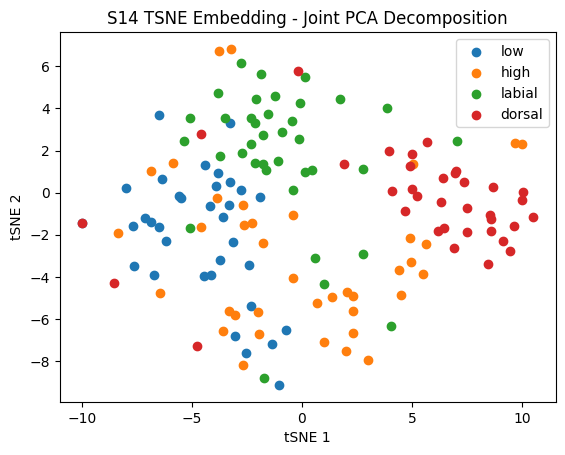

In [350]:
data = S14_embed_time
labels = S14_artic_labels[:,0]
label_names = artic_labels

plt.figure()
for lab in np.unique(labels):
    plt.scatter(data[np.where(labels == lab)[0],0], data[np.where(labels == lab)[0],1], label=label_names[lab-1])
# plt.scatter(S14_embed_t0[:,0], S14_embed_t0[:,1], c=S14_artic_labels[:,0])
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.title('S14 TSNE Embedding - Joint PCA Decomposition')
plt.legend()
plt.show()

# f = plt.figure()
# ax = f.add_subplot(projection='3d')
# for lab in np.unique(labels):
#     ax.scatter(data[np.where(labels == lab)[0],0], data[np.where(labels == lab)[0],1], data[np.where(labels == lab)[0],2], label=label_names[lab-1])
# # plt.scatter(S14_embed_t0[:,0], S14_embed_t0[:,1], c=S14_artic_labels[:,0])
# plt.xlabel('tSNE 1')
# plt.ylabel('tSNE 2')
# ax.set_zlabel('tSNE 3')
# plt.title('S14 TSNE Embedding - Joint PCA Decomposition')
# plt.legend()
# plt.show()

In [351]:
from sklearn.metrics import silhouette_score, silhouette_samples

S14_joint_sil_scores = silhouette_samples(S14_embed_time, S14_artic_labels[:,0])
# S14_joint_sil = silhouette_score(S14_embed_time, S14_artic_labels[:,0])
print(f'S14 Joint-PCA Silhouette Score: {np.mean(S14_joint_sil_scores[np.where(S14_joint_sil_scores > 0)[0]])}')

S26_joint_sil_scores = silhouette_samples(S26_embed_time, S26_artic_labels[:,0])
# S26_joint_sil = silhouette_score(S26_embed_time, S26_artic_labels[:,0])
print(f'S26 Joint-PCA Silhouette Score: {np.mean(S26_joint_sil_scores[np.where(S26_joint_sil_scores > 0)[0]])}')

S23_joint_sil_scores = silhouette_samples(S23_embed_time, S23_artic_labels[:,0])
# S23_joint_sil = silhouette_score(S23_embed_time, S23_artic_labels[:,0])
print(f'S23 Joint-PCA Silhouette Score: {np.mean(S23_joint_sil_scores[np.where(S23_joint_sil_scores > 0)[0]])}')

S33_joint_sil_scores = silhouette_samples(S33_embed_time, S33_artic_labels[:,0])
# S33_joint_sil = silhouette_score(S33_embed_time, S33_artic_labels[:,0])
print(f'S33 Joint-PCA Silhouette Score: {np.mean(S33_joint_sil_scores[np.where(S33_joint_sil_scores > 0)[0]])}')

S14 Joint-PCA Silhouette Score: 0.34902891516685486
S26 Joint-PCA Silhouette Score: 0.1355254352092743
S23 Joint-PCA Silhouette Score: 0.21294309198856354
S33 Joint-PCA Silhouette Score: 0.304548442363739


In [352]:
pca_var = 0.8

##### P1 Data #####
S14_sep_pca_X = S14_hg_trace.reshape(S14_hg_trace.shape[0], -1)
S14_sep_pca = PCA(n_components=pca_var).fit_transform(S14_sep_pca_X)
S14_sep_embed = TSNE(n_components=2, perplexity=30).fit_transform(S14_sep_pca)

S26_sep_pca_X = S26_hg_trace.reshape(S26_hg_trace.shape[0], -1)
S26_sep_pca = PCA(n_components=pca_var).fit_transform(S26_sep_pca_X)
S26_sep_embed = TSNE(n_components=2, perplexity=30).fit_transform(S26_sep_pca)

S23_sep_pca_X = S23_hg_trace.reshape(S23_hg_trace.shape[0], -1)
S23_sep_pca = PCA(n_components=pca_var).fit_transform(S23_sep_pca_X)
S23_sep_embed = TSNE(n_components=2, perplexity=30).fit_transform(S23_sep_pca)

S33_sep_pca_X = S33_hg_trace.reshape(S33_hg_trace.shape[0], -1)
S33_sep_pca = PCA(n_components=pca_var).fit_transform(S33_sep_pca_X)
S33_sep_embed = TSNE(n_components=2, perplexity=30).fit_transform(S33_sep_pca)


##### Collapsed Across Positions #####
S14_coll_pca_X = S14_hg_collapsed.reshape(S14_hg_collapsed.shape[0], -1)
S14_coll_pca = PCA(n_components=pca_var).fit_transform(S14_coll_pca_X)
S14_coll_embed = TSNE(n_components=2, perplexity=30).fit_transform(S14_coll_pca)

S26_coll_pca_X = S26_hg_collapsed.reshape(S26_hg_collapsed.shape[0], -1)
S26_coll_pca = PCA(n_components=pca_var).fit_transform(S26_coll_pca_X)
S26_coll_embed = TSNE(n_components=2, perplexity=30).fit_transform(S26_coll_pca)

S23_coll_pca_X = S23_hg_collapsed.reshape(S23_hg_collapsed.shape[0], -1)
S23_coll_pca = PCA(n_components=pca_var).fit_transform(S23_coll_pca_X)
S23_coll_embed = TSNE(n_components=2, perplexity=30).fit_transform(S23_coll_pca)

S33_coll_pca_X = S33_hg_collapsed.reshape(S33_hg_collapsed.shape[0], -1)
S33_coll_pca = PCA(n_components=pca_var).fit_transform(S33_coll_pca_X)
S33_coll_embed = TSNE(n_components=2, perplexity=30).fit_transform(S33_coll_pca)

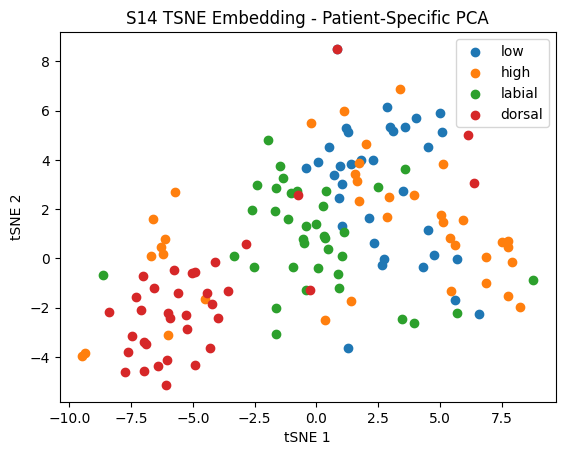

In [353]:
data = S14_sep_embed
# labels = S14_artic_labels_collapsed
labels = S14_artic_labels[:,0]
label_names = artic_labels

plt.figure()
for lab in np.unique(labels):
    plt.scatter(data[np.where(labels == lab)[0],0], data[np.where(labels == lab)[0],1], label=label_names[lab-1])
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.title('S14 TSNE Embedding - Patient-Specific PCA')
plt.legend()
plt.show()

# f = plt.figure()
# ax = f.add_subplot(projection='3d')
# for lab in np.unique(labels):
#     ax.scatter(data[np.where(labels == lab)[0],0], data[np.where(labels == lab)[0],1], data[np.where(labels == lab)[0],2], label=label_names[lab-1])
# # plt.scatter(S14_embed_t0[:,0], S14_embed_t0[:,1], c=S14_artic_labels[:,0])
# plt.xlabel('tSNE 1')
# plt.ylabel('tSNE 2')
# ax.set_zlabel('tSNE 3')
# plt.title('S14 TSNE Embedding - Patient-Specific PCA')
# plt.legend()
# plt.show()

In [354]:
from sklearn.metrics import silhouette_score, silhouette_samples

S14_sep_sil_scores = silhouette_samples(S14_sep_embed, S14_artic_labels[:,0])
# S14_sep_sil = silhouette_score(S14_sep_embed, S14_artic_labels[:,0])
print(f'S14 PS-PCA Silhouette Score: {np.mean(S14_sep_sil_scores[np.where(S14_sep_sil_scores > 0)[0]])}')

S26_sep_sil_scores = silhouette_samples(S26_sep_embed, S26_artic_labels[:,0])
# S26_sep_sil = silhouette_score(S26_sep_embed, S26_artic_labels[:,0])
print(f'S26 PS-PCA Silhouette Score: {np.mean(S26_sep_sil_scores[np.where(S26_sep_sil_scores > 0)[0]])}')

S23_sep_sil_scores = silhouette_samples(S23_sep_embed, S23_artic_labels[:,0])
# S23_sep_sil = silhouette_score(S23_sep_embed, S23_artic_labels[:,0])
print(f'S23 PS-PCA Silhouette Score: {np.mean(S23_sep_sil_scores[np.where(S23_sep_sil_scores > 0)[0]])}')

S33_sep_sil_scores = silhouette_samples(S33_sep_embed, S33_artic_labels[:,0])
# S33_sep_sil = silhouette_score(S33_sep_embed, S33_artic_labels[:,0])
print(f'S33 PS-PCA Silhouette Score: {np.mean(S33_sep_sil_scores[np.where(S33_sep_sil_scores > 0)[0]])}')

S14 PS-PCA Silhouette Score: 0.32603955268859863
S26 PS-PCA Silhouette Score: 0.1765202283859253
S23 PS-PCA Silhouette Score: 0.19389130175113678
S33 PS-PCA Silhouette Score: 0.29750218987464905
